**Do the coding here**

So i will be creating the sections so you can add code  and you can perform the visualization

In [ ]:
# Alex

In [34]:
pip install fuzzywuzzy

Note: you may need to restart the kernel to use updated packages.


In [35]:
import pandas as pd # Import relevant packages
import numpy as np 
import matplotlib.pyplot as plt
from fuzzywuzzy import fuzz
from fuzzywuzzy import process

In [36]:
paper_counts = pd.read_csv('Group 6/paper_counts.csv') # Read in datasets
authors = pd.read_csv('Group 6/authors.schistosomiasis.csv')
articles = pd.read_csv('Group 6/articles.schistosomiasis.csv')

In [37]:
authors_articles = articles.merge(authors, on = ['PMID'], how = 'outer') # Merge the authors and articles datasets to create a comprehensive list of every article and author in this particular field
authors_articles = authors_articles.set_index(['PMID', ]) # Set PMID as the index
authors_articles['Full Name and Initials'] = '(' + authors_articles['AuthorInitials'] + ')' + ' ' + authors_articles['AuthorForename'] + ' ' + authors_articles['AuthorLastname'] # Create a new column with initials, first and last name to count the number of times each author appears
authors_articles.to_csv('author_articles.csv') # Display the dataframe
authors_articles

,Title,Abstract,ISSN,Journal,Location,Year,FirstAuthorForename,FirstAuthorLastname,FirstAuthorInitials,FirstAuthorAffiliation,AuthorN,AuthorForename,AuthorLastname,AuthorInitials,AuthorAffiliation,Full Name and Initials
PMID,,,,,,,,,,,,,,,,
10543349,HAV and HEV infection in hospitalised hepatiti...,A total of 202 serum and stool samples from ac...,0393-2990,European journal of epidemiology,(15) 603-9,1999,M,Divizia,M,"Department of Public Health, University of Tor...",1.0,M,Divizia,M,"Department of Public Health, University of Tor...",(M) M Divizia
10543349,HAV and HEV infection in hospitalised hepatiti...,A total of 202 serum and stool samples from ac...,0393-2990,European journal of epidemiology,(15) 603-9,1999,M,Divizia,M,"Department of Public Health, University of Tor...",2.0,R,Gabrieli,R,NaN,(R) R Gabrieli
10543349,HAV and HEV infection in hospitalised hepatiti...,A total of 202 serum and stool samples from ac...,0393-2990,European journal of epidemiology,(15) 603-9,1999,M,Divizia,M,"Department of Public Health, University of Tor...",3.0,M L,Stefanoni,ML,NaN,(ML) M L Stefanoni
10543349,HAV and HEV infection in hospitalised hepatiti...,A total of 202 serum and stool samples from ac...,0393-2990,European journal of epidemiology,(15) 603-9,1999,M,Divizia,M,"Department of Public Health, University of Tor...",4.0,E,Renganathan,E,NaN,(E) E Renganathan
10543349,HAV and HEV infection in hospitalised hepatiti...,A total of 202 serum and stool samples from ac...,0393-2990,European journal of epidemiology,(15) 603-9,1999,M,Divizia,M,"Department of Public Health, University of Tor...",5.0,E,El Ghazzawi,E,NaN,(E) E El Ghazzawi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38095735,Predicting the potential nationwide distributi...,Schistosomiasis remains a major public health ...,1432-1955,Parasitology research,(123) 41,2023,Loida M,Recopuerto-Medina,LM,"Department of Biological Sciences, College of ...",3.0,Bianca Manuela M,Baldonado,BMM,"Department of Biological Sciences, College of ...",(BMM) Bianca Manuela M Baldonado
38095735,Predicting the potential nationwide distributi...,Schistosomiasis remains a major public health ...,1432-1955,Parasitology research,(123) 41,2023,Loida M,Recopuerto-Medina,LM,"Department of Biological Sciences, College of ...",4.0,Rica Nikki B,Bilasano,RNB,"Department of Biological Sciences, College of ...",(RNB) Rica Nikki B Bilasano
38095735,Predicting the potential nationwide distributi...,Schistosomiasis remains a major public health ...,1432-1955,Parasitology research,(123) 41,2023,Loida M,Recopuerto-Medina,LM,"Department of Biological Sciences, College of ...",5.0,Sophia Miel L,Dullano,SML,"Department of Biological Sciences, College of ...",(SML) Sophia Miel L Dullano


In [38]:
author_count = pd.DataFrame(authors_articles['Full Name and Initials'].value_counts()) # Count the number of times each unique author appears in the authors_articles dataframe
author_count = author_count.reset_index() # Reset the index
author_count # Display the dataframe 

,Full Name and Initials,count
0,(J) Jürg Utzinger,169
1,(XN) Xiao-Nong Zhou,157
2,(DP) Donald P McManus,144
3,(JR) J Russell Stothard,109
4,(J) Jing Xu,96
...,...,...
32345,(MA) Meagan A Barry,1
32346,(SC) Sabine C Momo,1
32347,(JY) Jia-Ying Yuan,1
32348,(XL) Xiao-Lu Liang,1


Text(0.5, 1.0, 'Most Active Schistomiasis Researchers')

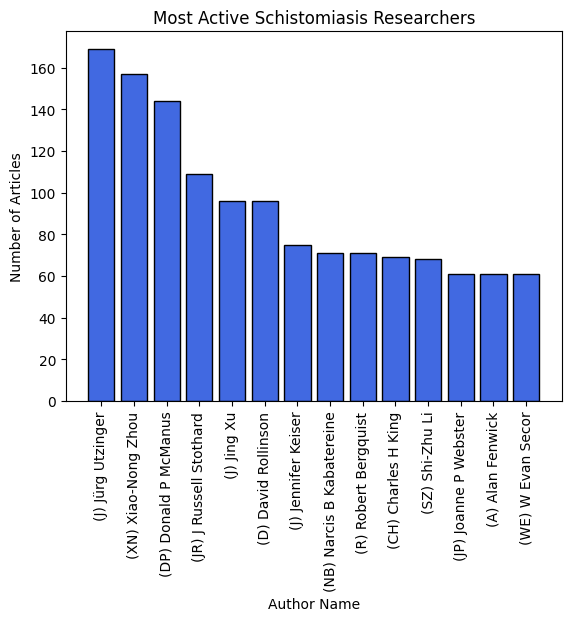

In [39]:
most_active_authors = [] # Create empty lists to append with the most active authors and their corresponding count
most_active_authors_value = []

for i in range(len(author_count)): # Loop over list of unique authors 
    if author_count['count'][i] > 60: # Set a condition for the most active authors
        most_active_authors_value.append(author_count['count'][i]) # Append the lists with the relevant information
        most_active_authors.append(author_count['Full Name and Initials'][i])

fig, ax = plt.subplots() # Create a set of axes
ax.bar(np.arange(len(most_active_authors_value)), most_active_authors_value, edgecolor = 'black', color = 'royalblue') # Create a bar chart with the count of the most active authors and place the bars at arbitrary x values that can be replaced with author name
ax.set_xticks(np.arange(len(most_active_authors_value)), most_active_authors, rotation = 90) # Replace arbitrary x values with author name
ax.set_xlabel('Author Name') # Set axis labels and title
ax.set_ylabel('Number of Articles')
ax.set_title('Most Active Schistomiasis Researchers')

In [ ]:
#Liu

In [ ]:
#Kp